# TASK 1 : Retrieving and Preparing the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = 'Data_User_Modeling_Training_Dataset.csv'
trainingdf = pd.read_csv(training, sep=',', decimal='.',
header=[0])

In [3]:
trainingdf

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [4]:
testing = 'Data_User_Modeling_Test_Dataset.csv'
testingdf = pd.read_csv(testing, sep=',', decimal='.',
header=[0])

In [5]:
testingdf

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [6]:
trainingdf.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [7]:
testingdf.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [8]:
trainingdf.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object

In [9]:
testingdf.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object

In [10]:
testingdf.describe()

,STG,SCG,STR,LPR,PEG
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.321103,0.356414,0.439241,0.428903,0.452483
std,0.212051,0.222482,0.247782,0.274403,0.287077
min,0.000000,0.000000,0.010000,0.000000,0.010000
25%,0.160000,0.200000,0.230000,0.240000,0.240000
50%,0.270000,0.290000,0.410000,0.320000,0.320000
75%,0.410000,0.520000,0.660000,0.670000,0.660000
max,0.900000,0.900000,0.910000,0.990000,0.990000


In [11]:
trainingdf.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


# Task 2: Data Exploration

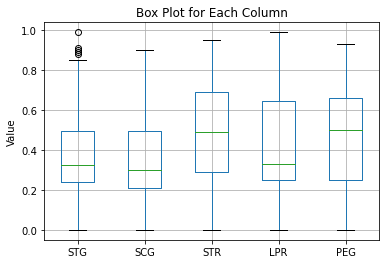

In [12]:
tempdf = trainingdf.drop(' UNS', axis=1)
fig, ax = plt.subplots()
tempdf.boxplot(ax=ax)
ax.set_xticklabels(tempdf.columns)

plt.ylabel('Value')
plt.title('Box Plot for Each Column')

plt.show()

Text(0.5, 1.0, 'Relation between all attributes')

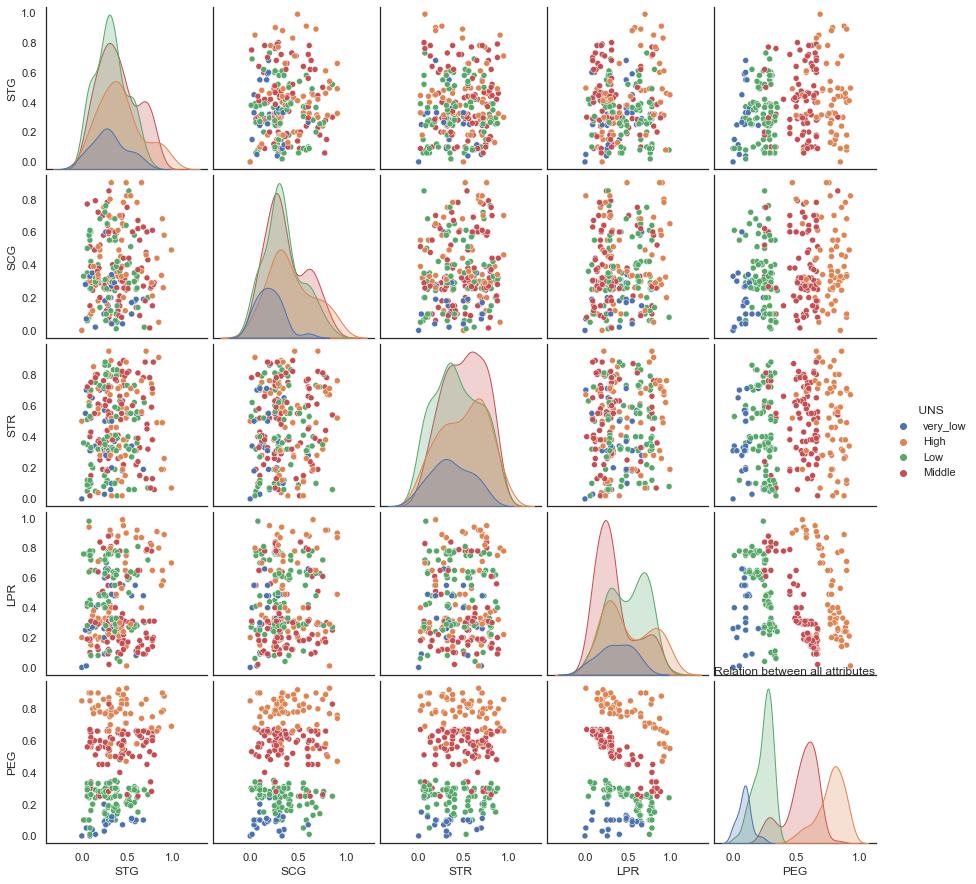

In [13]:
sns.set(style="white")
sns.pairplot(trainingdf, hue=" UNS")
plt.title("Relation between all attributes")

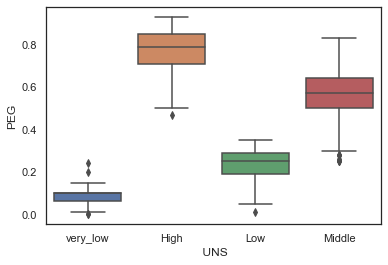

In [14]:
sns.boxplot(x=' UNS', y='PEG', data=trainingdf)
plt.show()

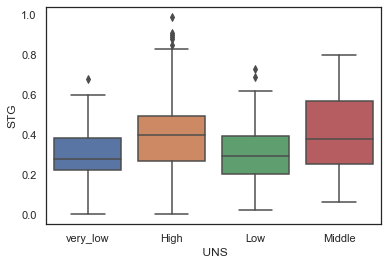

In [15]:
sns.boxplot(x=' UNS', y='STG', data=trainingdf)
plt.show()

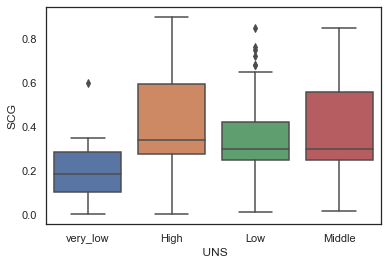

In [16]:
sns.boxplot(x=' UNS', y='SCG', data=trainingdf)
plt.show()

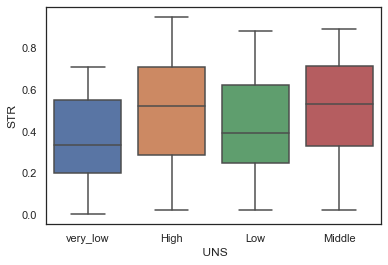

In [17]:
sns.boxplot(x=' UNS', y='STR', data=trainingdf)
plt.show()

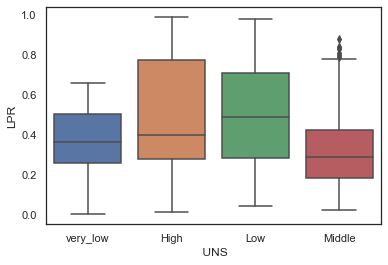

In [18]:
sns.boxplot(x=' UNS', y='LPR', data=trainingdf)
plt.show()

# TASK 3 : DATA MODELLING

# K-nearest neighbour classifier:

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

xtrain = trainingdf.drop(' UNS', axis=1)
le = LabelEncoder()
ytrain = le.fit_transform(trainingdf[' UNS'])
xtest = testingdf.drop(' UNS', axis=1)
ytest = le.fit_transform(testingdf[' UNS'])

In [20]:
ytest

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2])

In [21]:
bestKValue = 0 
newAcc = 0
for k in range(1, 21):
    # Train the KNN classifier on the training set
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(xtrain, ytrain)
    
    # Evaluate the performance on the validation set
    predicted = clf.predict(xtest)
    acc = accuracy_score(ytest, predicted)
    if newAcc < acc:
        bestKValue = k
        newAcc = acc
    print(f"k={k}, accuracy={acc}")

k=1, accuracy=0.8137931034482758
k=2, accuracy=0.8
k=3, accuracy=0.8689655172413793
k=4, accuracy=0.8137931034482758
k=5, accuracy=0.8344827586206897
k=6, accuracy=0.8137931034482758
k=7, accuracy=0.8068965517241379
k=8, accuracy=0.8
k=9, accuracy=0.8
k=10, accuracy=0.7931034482758621
k=11, accuracy=0.7931034482758621
k=12, accuracy=0.7724137931034483
k=13, accuracy=0.7655172413793103
k=14, accuracy=0.7655172413793103
k=15, accuracy=0.7655172413793103
k=16, accuracy=0.7586206896551724
k=17, accuracy=0.7517241379310344
k=18, accuracy=0.7517241379310344
k=19, accuracy=0.7517241379310344
k=20, accuracy=0.7517241379310344


In [22]:
clf = KNeighborsClassifier(bestKValue)
clf.fit(xtrain, ytrain)
predicted = clf.predict(xtest)
predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 3, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 3,
       1, 0, 2, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2])

In [23]:
cm = confusion_matrix(ytest,predicted)
print(cm)

[[39  0  0  0]
 [ 0 44  2  0]
 [ 2  6 26  0]
 [ 0  9  0 17]]


In [24]:
print("[Train/test split] score: {:.5f}".format(clf.score(xtest, ytest)))

[Train/test split] score: 0.86897


# K-Folds Cross-Validation

In [25]:
users = pd.concat([trainingdf, testingdf])

In [26]:
users

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [27]:
X = users.drop(' UNS', axis=1).to_numpy()
le = LabelEncoder()
y = le.fit_transform( users[' UNS'])
# Create a KFold object with 5 splits
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=20, shuffle=True)
clf = KNeighborsClassifier(bestKValue)
scores = []

for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    scores.append(clf.score(X_test, y_test))
    
average_score = sum(scores) / len(scores)
print('Average score:', average_score)

[fold 0] score: 0.85714
[fold 1] score: 0.76190
[fold 2] score: 0.80952
[fold 3] score: 0.95000
[fold 4] score: 0.85000
[fold 5] score: 0.80000
[fold 6] score: 1.00000
[fold 7] score: 0.90000
[fold 8] score: 0.65000
[fold 9] score: 0.85000
[fold 10] score: 0.80000
[fold 11] score: 0.85000
[fold 12] score: 0.95000
[fold 13] score: 0.75000
[fold 14] score: 0.80000
[fold 15] score: 0.85000
[fold 16] score: 0.90000
[fold 17] score: 0.80000
[fold 18] score: 0.80000
[fold 19] score: 0.80000
Average score: 0.8364285714285715


# KNN with Parameter Tuning Effect

In [28]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tempdf = users.drop(' UNS', axis=1) 
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users[' UNS'])
new_Ind = []
cur_MaxScore = 0.0
col_num = 5
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(bestKValue, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        print(tempdf.columns[new_Ind])

Score with 1 selected features: 0.7407407407407407
Index(['PEG'], dtype='object')
Score with 2 selected features: 0.7716049382716049
Index(['PEG', 'STG'], dtype='object')
Score with 3 selected features: 0.8888888888888888
Index(['PEG', 'STG', 'LPR'], dtype='object')


# Decision tree classification

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tempdf = users.drop(' UNS', axis=1)
X = tempdf.to_numpy()
le = LabelEncoder()
y = le.fit_transform( users[' UNS'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
cm
print(classification_report(y_test,y_pre))
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.83      0.89      0.86        45
           2       0.91      0.96      0.94        54
           3       0.80      0.67      0.73        12
           4       0.70      0.54      0.61        13

    accuracy                           0.88       162
   macro avg       0.84      0.80      0.82       162
weighted avg       0.88      0.88      0.88       162

[Train/test split] score: 0.88272


In [30]:
from sklearn import tree

with open('breast_cancer.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f, feature_names=tempdf.columns, class_names=users[' UNS'].unique(), filled=True, rounded=True, special_characters=True)